# Appliance Energy prediction

Appliances energy consumption will paly a major role in understanding electrical energy demand. 
Appliances, such as televisions and consumer electronics operating in standby were attributed to a 10.2% increase in the electricity consumption. 
Thus, prediction models of electrical energy consumption in buildings can be use-ful for a number of applications: 
     To determine adequate sizing of photovoltaics and energy storage to diminish power flow into the grid
     To detect abnormal energy use patterns 
     To be part of an energy management system for load control


In [1]:
#Loading Libraries
import time
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
from scipy import stats
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import RANSACRegressor, LinearRegression,TheilSenRegressor

from sklearn.metrics import explained_variance_score, mean_absolute_error,mean_squared_error, median_absolute_error, r2_score

/home/dinesh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/dinesh/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:

from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import cross_val_score
import seaborn as sns
from IPython.display import Image
%matplotlib inline

In [3]:
#Loading dataset
df=pd.read_csv("energydata_complete.csv")

In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
#Building Regression models
from sklearn.model_selection import train_test_split

In [8]:
y=df["Appliances"]

In [9]:
X=df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
X_test.shape

(4934, 27)

In [13]:
lm=LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
Coeffiecient=lm.coef_

In [16]:
print(Coeffiecient)

[  2.10479733  -0.46626347  14.61618426 -16.61145842 -12.85171277
  24.1394585    4.68018159  -4.37044602  -0.06285119  -0.80260292
   0.23703713   7.06106895   0.28364171   1.97657274  -1.62337008
   8.16831723  -4.66678406 -14.30530192  -0.80937378 -10.28281641
   0.16659669  -1.09713003   1.65345898   0.2054929    5.12842913
  -0.03328512  -0.03328512]


In [17]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

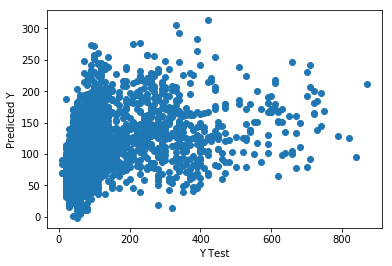

In [18]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [19]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 53.5455982386
MSE: 8738.47187395
RMSE: 93.479793934


In [20]:
#Feature Engineering
df['date']=pd.to_datetime(df['date'])


In [21]:
df['day_of_week'] = df['date'].dt.weekday_name
df['seconds'] = df['date'].dt.hour*3600 + df['date'].dt.minute*60 + df['date'].dt.second

In [22]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,day_of_week,seconds
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,Monday,61200
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,Monday,61800
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,Monday,62400
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,Monday,63000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,Monday,63600


In [23]:
df['week_status']=df['day_of_week']

In [24]:
week_mapping = {"Monday": "Weekday", "Tuesday": "Weekday", "Wednesday": "Weekday", "Thursday": "Weekday", "Friday": "Weekday","Saturday": "Weekend", "Sunday": "Weekend"}
for dataset in [df]:
    dataset['week_status'] = dataset['week_status'].map(week_mapping)

In [25]:
dow = pd.get_dummies(df['day_of_week'],drop_first=True,prefix='dow')

ws=pd.get_dummies(df['week_status'],drop_first=True,prefix='ws')


In [26]:
df.drop(['day_of_week','week_status'],axis=1,inplace=True)

df = pd.concat([df,dow,ws],axis=1)


In [27]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv1,rv2,seconds,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,ws_Weekend
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,61200,1,0,0,0,0,0,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,61800,1,0,0,0,0,0,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,62400,1,0,0,0,0,0,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,63000,1,0,0,0,0,0,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,63600,1,0,0,0,0,0,0


In [28]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'seconds', 'dow_Monday',
       'dow_Saturday', 'dow_Sunday', 'dow_Thursday', 'dow_Tuesday',
       'dow_Wednesday', 'ws_Weekend'],
      dtype='object')

R2 score: 0.172921


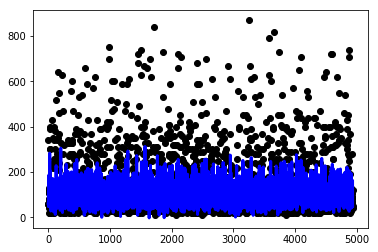

In [29]:
#Ridge regression
alphas = np.arange(0.1,5,0.1)
model = Ridge()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
y_pred = cv.fit(X_train, y_train).predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
#print ('Features: %s'%str(features))
print ('R2 score: %f'%r2_score(y_test, y_pred))
#print ('Intercept: %f'%regr.intercept_)
#print ('Coefficients: %s'%str(regr.coef_))

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 53.5448016311
MSE: 8738.691613
RMSE: 93.4809692558


In [31]:
#Applying Randomforest regessor
from sklearn.ensemble import RandomForestRegressor

In [32]:

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
regressor.score(X_test, y_test)

0.45960057504211238

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 36.2413862991
MSE: 5709.71402513
RMSE: 75.5626496699


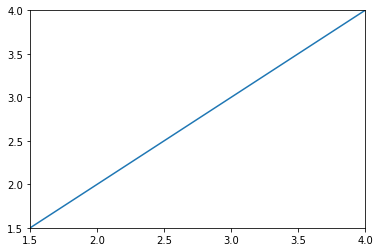

In [36]:
plt.scatter(x=y_test, y=y_pred)
plt.xlim([1.5,4])
plt.ylim([1.5,4])
plt.plot([1.5,4],[1.5,4])
plt.show()

In [154]:
#Interpretng Model results
feature_import = pd.DataFrame(data=regressor.feature_importances_, index=X.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

,seconds,RH_8,Press_mm_hg,RH_7,RH_1,RH_3,T3,RH_5,RH_2,RH_out,...,Visibility,rv1,rv2,dow_Monday,dow_Saturday,ws_Weekend,dow_Sunday,dow_Tuesday,dow_Wednesday,dow_Thursday
values,0.084182,0.039706,0.039138,0.038737,0.038685,0.038166,0.038013,0.037919,0.037443,0.036628,...,0.020159,0.018308,0.018116,0.00525,0.003833,0.003522,0.00282,0.002769,0.002467,0.002187


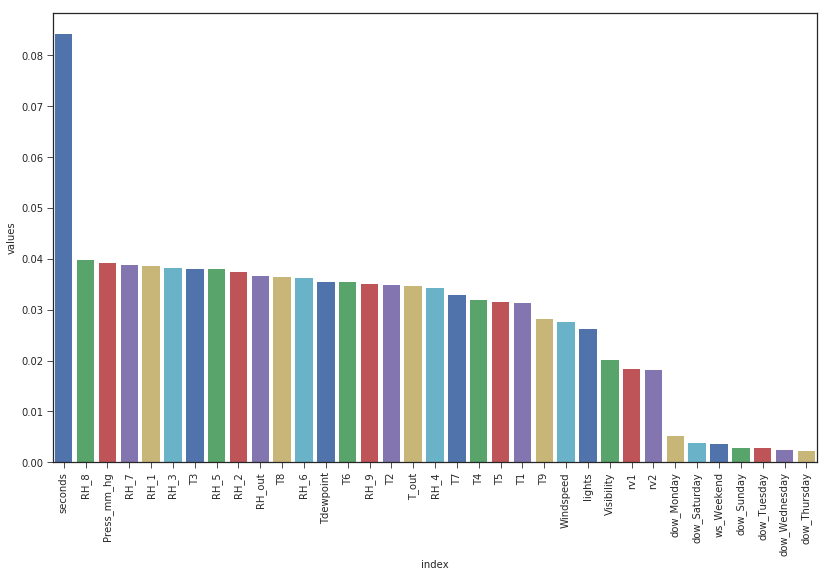

In [156]:
#Feature Importance
feature_import.reset_index(level=0, inplace=True)
sns.set_style('ticks')
fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(13.7, 8.27)
sns.barplot(x='index', y='values', data=feature_import, palette='deep',saturation=.9)


rotation = 90
for i, ax in enumerate(fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)


plt.show()



In [39]:
#Finding Hyper Parameters using gridsearch
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [200, 500],
    "max_depth": [3, None],
    "max_features": [1, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False]}


In [40]:
model = RandomForestRegressor(random_state=0)

In [41]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 500], 'max_depth': [3, None], 'max_features': [1, 3, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
print(grid.best_score_)
print(grid.best_params_)

0.498940498054
{'bootstrap': False, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [43]:
results = grid.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'],results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 0.0441 0.0023
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500} 0.0459 0.0028
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} 0.0445 0.0025
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500} 0.0463 0.003
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200} 0.0444 0.0026
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500} 0.0463 0.0031
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200} 0.0444 0.0025
{'bootstrap': True, 'max_depth': 3, 'max

In [54]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'seconds', 'dow_Monday',
       'dow_Saturday', 'dow_Sunday', 'dow_Thursday', 'dow_Tuesday',
       'dow_Wednesday', 'ws_Weekend'],
      dtype='object')

In [157]:
X=df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'seconds', 'dow_Monday',
       'dow_Saturday', 'dow_Sunday', 'dow_Thursday', 'dow_Tuesday',
       'dow_Wednesday', 'ws_Weekend']]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [159]:
regressor = RandomForestRegressor(random_state=0, n_estimators=500, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [160]:
regressor.score(X_test, y_test)

0.6158559823762616

In [161]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 42.0008537483
MSE: 6394.78008963
RMSE: 79.9673689053


In [162]:

#######  Feature scaling#####
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
scaled_test = scaler.transform(X_test)


scaler.fit(X_train)
scaled_train = scaler.transform(X_train)




In [163]:
regressor = RandomForestRegressor(random_state=0, n_estimators=500, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
regressor.fit(scaled_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [164]:
regressor.score(scaled_test, y_test)

0.60362213682168275

In [141]:
###  Feature Selection  ##

# Recursive Feature Elimination

from sklearn.feature_selection import RFE


model = RandomForestRegressor(random_state=0, n_estimators=500, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
# create the RFE model and select 4 attributes
rfe = RFE(model, None)
rfe = rfe.fit(X_train,y_train )
# summarize the selection of the attributes
fs_s=rfe.support_
fs_r=rfe.ranking_


In [142]:
fs_r

array([ 9,  6,  1,  1,  1,  1,  1,  5,  3,  4,  1,  1,  1,  1,  1,  1,  1,
        8,  1,  2,  1,  1,  7, 10,  1, 11, 12,  1, 13, 14, 16, 19, 17, 18,
       15])

In [143]:
fr = pd.DataFrame(X.columns,fs_r)

In [144]:
fr

,0
9,lights
6,T1
1,RH_1
1,T2
1,RH_2
1,T3
1,RH_3
5,T4
3,RH_4
4,T5


In [165]:
#Interpretng Model results
feature_import = pd.DataFrame(data=regressor.feature_importances_, index=X.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

,seconds,RH_8,Press_mm_hg,RH_7,RH_1,RH_3,T3,RH_5,RH_2,RH_out,...,Visibility,rv1,rv2,dow_Monday,dow_Saturday,ws_Weekend,dow_Sunday,dow_Tuesday,dow_Wednesday,dow_Thursday
values,0.084182,0.039706,0.039138,0.038737,0.038685,0.038166,0.038013,0.037919,0.037443,0.036628,...,0.020159,0.018308,0.018116,0.00525,0.003833,0.003522,0.00282,0.002769,0.002467,0.002187


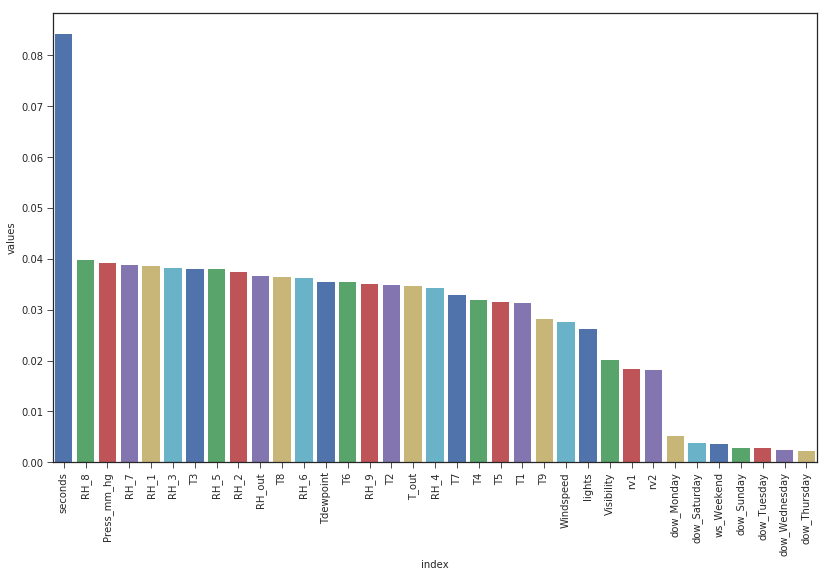

In [166]:
#Feature Importance
feature_import.reset_index(level=0, inplace=True)
sns.set_style('ticks')
fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(13.7, 8.27)
sns.barplot(x='index', y='values', data=feature_import, palette='deep',saturation=.9)


rotation = 90
for i, ax in enumerate(fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)


plt.show()


In [194]:
X=df[[ 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8',  'RH_9','T9', 'T_out', 'Press_mm_hg', 'Windspeed','RH_out', 
       'Tdewpoint', 'seconds']]

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [196]:
X_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,RH_9,T9,T_out,Press_mm_hg,Windspeed,RH_out,Tdewpoint,seconds
17803,24.50,36.590000,22.540000,37.620000,24.100,31.976000,24.751429,36.264286,23.790000,41.99250,...,25.29,38.497143,40.741429,23.89,8.666667,755.550000,5.833333,63.333333,2.016667,29400
6060,21.26,45.323333,19.856667,45.290000,21.525,42.425000,20.166667,43.663333,18.500000,52.13125,...,20.89,47.656667,45.090000,18.60,5.500000,752.700000,3.000000,98.000000,5.200000,68400
7567,20.89,36.564286,18.890000,38.090000,21.000,38.668571,19.390000,35.912500,18.200000,51.61750,...,21.00,44.500000,41.500000,18.50,3.721429,740.754762,7.857143,91.047619,2.330952,22200
14224,21.50,39.590000,22.500000,36.966667,22.000,37.200000,22.000000,37.134000,19.890000,46.29000,...,21.39,40.400000,39.290000,20.29,11.433333,765.533333,1.000000,68.666667,5.733333,42000
7121,20.79,35.700000,18.290000,37.000000,21.000,35.700000,20.260000,33.966667,18.566667,40.09000,...,21.60,41.730000,38.730000,18.29,-2.950000,762.583333,2.000000,96.000000,-3.466667,13800


In [197]:
regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [198]:
regressor.score(X_test, y_test)

0.64518777503736424

In [199]:
y_pred = regressor.predict(X_test)

In [200]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 26.9784758816
MSE: 3748.84991285
RMSE: 61.2278524272


In [201]:
###### PCA  ####
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(scaled_train)

x_pca = pca.transform(scaled_train)

scaled_train.shape

x_pca.shape

t_pca=pca.transform(scaled_test)

In [202]:
print(pca.explained_variance_ratio_)

[  2.67511444e-01   2.02103148e-01   6.33054860e-02   5.83288226e-02
   5.56610066e-02   3.88044237e-02   3.54762436e-02   3.37633798e-02
   3.33933739e-02   3.31157537e-02   2.80039224e-02   2.75959113e-02
   2.37509505e-02   1.95600217e-02   1.52582251e-02   1.37563892e-02
   1.07572470e-02   5.74558205e-03   5.36453757e-03   4.26332589e-03
   3.97010756e-03   3.58031911e-03   3.12500915e-03   3.06913635e-03
   2.55247060e-03   1.99732987e-03   1.82497188e-03   1.26749030e-03
   1.15794148e-03   7.75774273e-04   6.36333325e-04   4.16214916e-04
   1.07707023e-04   5.73621204e-33   1.40739683e-33]


In [203]:
print(pca.singular_values_)

[  3.72263738e+02   3.23568392e+02   1.81092400e+02   1.73828570e+02
   1.69806801e+02   1.41781697e+02   1.35565246e+02   1.32252079e+02
   1.31525421e+02   1.30977553e+02   1.20445058e+02   1.19564409e+02
   1.10922602e+02   1.00661690e+02   8.89061001e+01   8.44173625e+01
   7.46500532e+01   5.45565083e+01   5.27163942e+01   4.69952341e+01
   4.53503547e+01   4.30665835e+01   4.02351105e+01   3.98738015e+01
   3.63630184e+01   3.21665475e+01   3.07473464e+01   2.56242919e+01
   2.44919214e+01   2.00469006e+01   1.81560715e+01   1.46837970e+01
   7.46967252e+00   5.45120042e-14   2.70014966e-14]


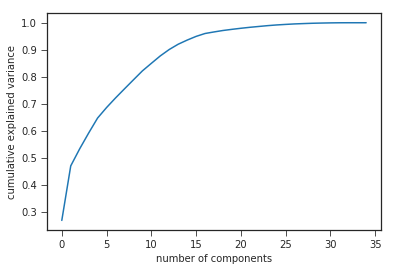

In [204]:
pca = PCA().fit(scaled_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [205]:
###### PCA  ####
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(scaled_train)

x_pca = pca.transform(scaled_train)

scaled_train.shape

x_pca.shape

t_pca=pca.transform(scaled_test)

In [206]:
regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
regressor.fit(x_pca, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [207]:
regressor.score(t_pca, y_test)

0.25159869394157697

In [208]:
y_pred = regressor.predict(t_pca)

In [209]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 47.7982772598
MSE: 7907.40558979
RMSE: 88.9235941119


R2 score: 0.164058


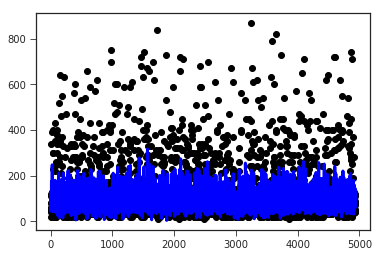

In [210]:
#Ridge regression
alphas = np.arange(0.1,5,0.1)
model = Ridge()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
y_pred = cv.fit(X_train, y_train).predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
#print ('Features: %s'%str(features))
print ('R2 score: %f'%r2_score(y_test, y_pred))
#print ('Intercept: %f'%regr.intercept_)
#print ('Coefficients: %s'%str(regr.coef_))

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 53.5855455166
MSE: 8719.17445694
RMSE: 93.3765198374


R2 score: 0.174768


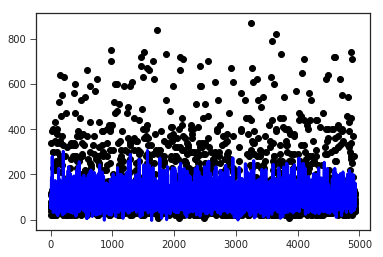

In [100]:
#Ridge regression
alphas = np.arange(0.1,5,0.1)
model = Ridge()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
y_pred = cv.fit(X_train, y_train).predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
#print ('Features: %s'%str(features))
print ('R2 score: %f'%r2_score(y_test, y_pred))
#print ('Intercept: %f'%regr.intercept_)
#print ('Coefficients: %s'%str(regr.coef_))

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 53.5855455166
MSE: 8719.17445694
RMSE: 93.3765198374


R2 score: 0.394762


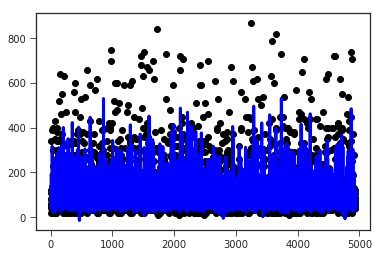

In [130]:
#GradientBoostingRegresson
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=500)
y_pred = model.fit(X_train, y_train).predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue',linewidth=3)
#print 'Features: %s'%str(features)
print ('R2 score: %f'%r2_score(y_test, y_pred))
#print 'Intercept: %f'%regr.intercept_
#print 'Coefficients: %s'%str(regr.coef_)

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 41.7175869663
MSE: 6320.01598107
RMSE: 79.4985281692
